In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Intialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.linspace(0, 1, size)
X2 = np.linspace(0,.2, size)

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

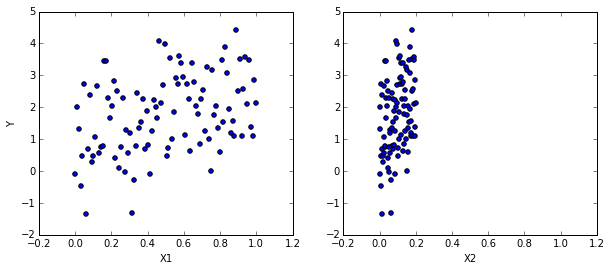

In [2]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [3]:
from pymc3 import Model, Normal, HalfNormal

In [4]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [22]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y = Normal('Y_obs', mu=mu, sd=sigma)

TypeError: For compute_test_value, one input test value does not have the requested type.

The error when converting the test value to that variable type:
Wrong number of dimensions: expected 0, got 1 with shape (100,).

In [23]:
alpha = Normal('alpha', mu=0, sd=10)
beta = Normal('beta', mu=0, sd=10, shape=2)
sigma = HalfNormal('sigma', sd=1)

# Expected value of outcome
mu = alpha + beta[0]*X1 + beta[1]*X2

# Likelihood (sampling distribution) of observations
Y = Normal('Y_obs', mu=mu, sd=sigma)

TypeError: No model on context stack, which is needed to use the Normal('x', 0,1) syntax. Add a 'with model:' block

In [5]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)

{'alpha': array(1.01366409951285), 'beta': array([ 1.46791595,  0.29358319]), 'sigma_log': array(0.11928764983495602)}


In [7]:
from scipy import optimize
from pymc3 import NUTS, sample

with basic_model:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = NUTS(scaling=start)

    # draw 2000 posterior samples
    trace = sample(2000, step, start=start)

 [-----------------100%-----------------] 2000 of 2000 complete in 5.4 sec

/home/downey/anaconda/lib/python2.7/site-packages/theano/gof/cmodule.py:293: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  rval = __import__(module_name, {}, {}, [module_name])


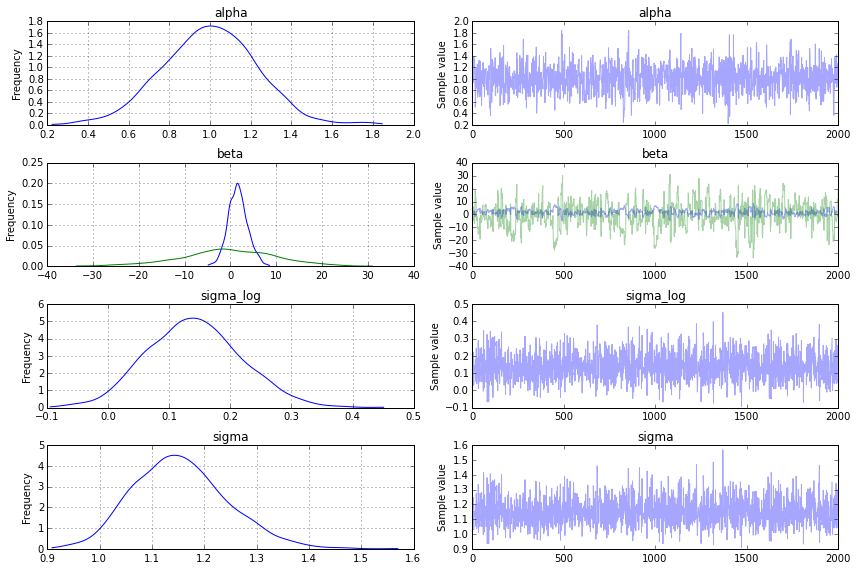

In [8]:
from pymc3 import traceplot

traceplot(trace);

In [9]:
from pymc3 import summary

summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.999            0.234            0.007            [0.535, 1.424]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.543          0.844          1.002          1.153          1.454


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.638            2.107            0.128            [-2.402, 5.976]
  -0.436           10.226           0.622            [-21.629, 19.058]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -2.333         0.188          1.580          2.918          6.062
  -21.700        -6.718         -0.4

In [13]:
type(basic_model)

pymc3.model.Model

In [14]:
type(trace)

pymc3.backends.base.MultiTrace

In [15]:
dir(trace)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attrs',
 '_slice',
 '_straces',
 'chains',
 'get_values',
 'nchains',
 'point',
 'varnames']

In [17]:
trace.varnames

['alpha', 'beta', 'sigma_log', 'sigma']

In [18]:
trace.get_values('alpha')

array([ 1.00911214,  1.00911214,  1.0349891 , ...,  1.17301994,
        1.01888131,  0.94337901])

In [19]:
dir(basic_model)

['Var',
 'Y_obs',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__enter__',
 '__exit__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_random_variable',
 'alpha',
 'basic_RVs',
 'beta',
 'cont_vars',
 'contexts',
 'd2logp',
 'deterministics',
 'disc_vars',
 'dlogp',
 'fastd2logp',
 'fastdlogp',
 'fastfn',
 'fastlogp',
 'fn',
 'free_RVs',
 'get_context',
 'get_contexts',
 'logp',
 'logp_elemwise',
 'logpt',
 'makefn',
 'missing_values',
 'model',
 'named_vars',
 'observed_RVs',
 'potentials',
 'profile',
 'sigma_log',
 'test_point',
 'unobserved_RVs',
 'vars']

In [20]:
basic_model.observed_RVs

[Y_obs]

In [21]:
basic_model.unobserved_RVs

[alpha, beta, sigma_log, sigma]